В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [ ]:
#link for .py file
#https://github.com/Selentieva/ML_learning/blob/91089712e97a98d5236e7b3f5f9dde171beec6c3/process_bank_churn.py

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from process_bank_churn import preprocess_data, preprocess_new_data

In [3]:
main_df = pd.read_csv('./bank-customer-churn-prediction-dlu/train.csv', index_col=0)

data = preprocess_data(main_df, scaler_numeric=False)
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

display(X_train)
display(train_targets)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,659.0,38.0,9.0,0.00,1.0,1.0,0.0,119882.70,0.0,0.0,1.0,1.0,0.0
1,717.0,38.0,6.0,0.00,3.0,1.0,0.0,158973.77,1.0,0.0,0.0,1.0,0.0
2,594.0,37.0,9.0,141788.63,2.0,0.0,1.0,176770.39,0.0,1.0,0.0,1.0,0.0
3,663.0,52.0,1.0,108891.70,1.0,1.0,0.0,194808.51,0.0,1.0,0.0,0.0,1.0
4,629.0,39.0,7.0,79610.92,2.0,1.0,1.0,84760.32,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,589.0,29.0,8.0,151607.56,1.0,1.0,0.0,90888.86,0.0,0.0,1.0,0.0,1.0
11996,615.0,31.0,5.0,145973.88,2.0,1.0,1.0,65612.12,0.0,1.0,0.0,0.0,1.0
11997,703.0,33.0,1.0,116947.76,2.0,1.0,0.0,134600.94,0.0,1.0,0.0,1.0,0.0
11998,597.0,31.0,10.0,123870.07,1.0,1.0,1.0,161519.77,1.0,0.0,0.0,0.0,1.0


id
9839     1.0
9680     0.0
7093     0.0
11293    1.0
820      0.0
        ... 
5191     0.0
13418    0.0
5390     0.0
860      0.0
7270     0.0
Name: Exited, Length: 12000, dtype: float64

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

In [5]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

train_probs = model.predict_proba(X_train)
val_probs = model.predict_proba(X_val)

display(len(train_targets), pd.Series(train_preds).value_counts(normalize=True))
display(len(val_targets),pd.Series(val_preds).value_counts(normalize=True))

12000

0.0    0.798083
1.0    0.201917
Name: proportion, dtype: float64

3000

0.0    0.787333
1.0    0.212667
Name: proportion, dtype: float64

AUROC for Training: 1.00


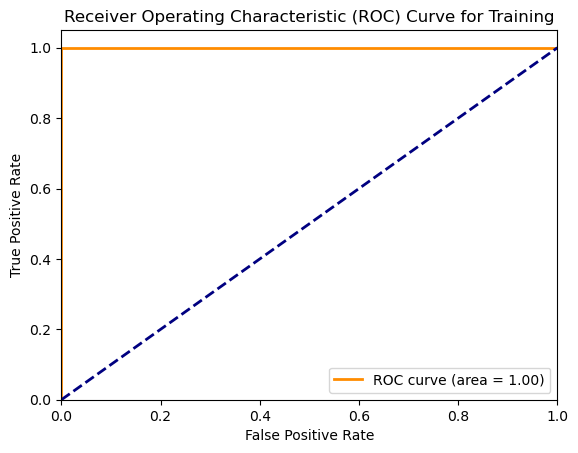

AUROC for Validation: 0.77


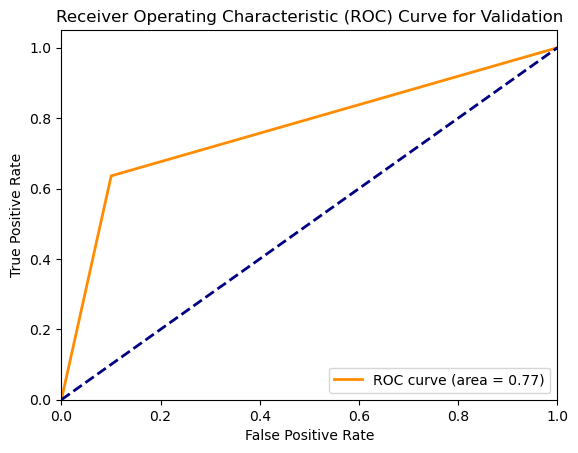

In [6]:
def compute_auroc_and_build_roc(inputs, targets, targets_probs, name=''):
  
  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, targets_probs, pos_label=1.0)
  # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, train_probs[:, 1], 'Training')
compute_auroc_and_build_roc(X_val, val_targets, val_probs[:, 1], 'Validation')

Тренувальні дані перетреновані так як маємо результати 100%, але валідаційні не дуже гарно відпрацювали, лише на 0.77 - це гірше ніж з регресійними моделями, але можливо ми покращимо це з додаванням більшої к-ті параметрів

In [7]:
cm_train = confusion_matrix(train_targets, train_preds, normalize='true')
cm_val = confusion_matrix(val_targets, val_preds, normalize='true')
print('CM score train df:\n', cm_train)
print('CM score val df:\n', cm_val)

CM score train df:
 [[1. 0.]
 [0. 1.]]
CM score val df:
 [[0.89962041 0.10037959]
 [0.36406995 0.63593005]]


In [8]:
model.tree_.max_depth

25

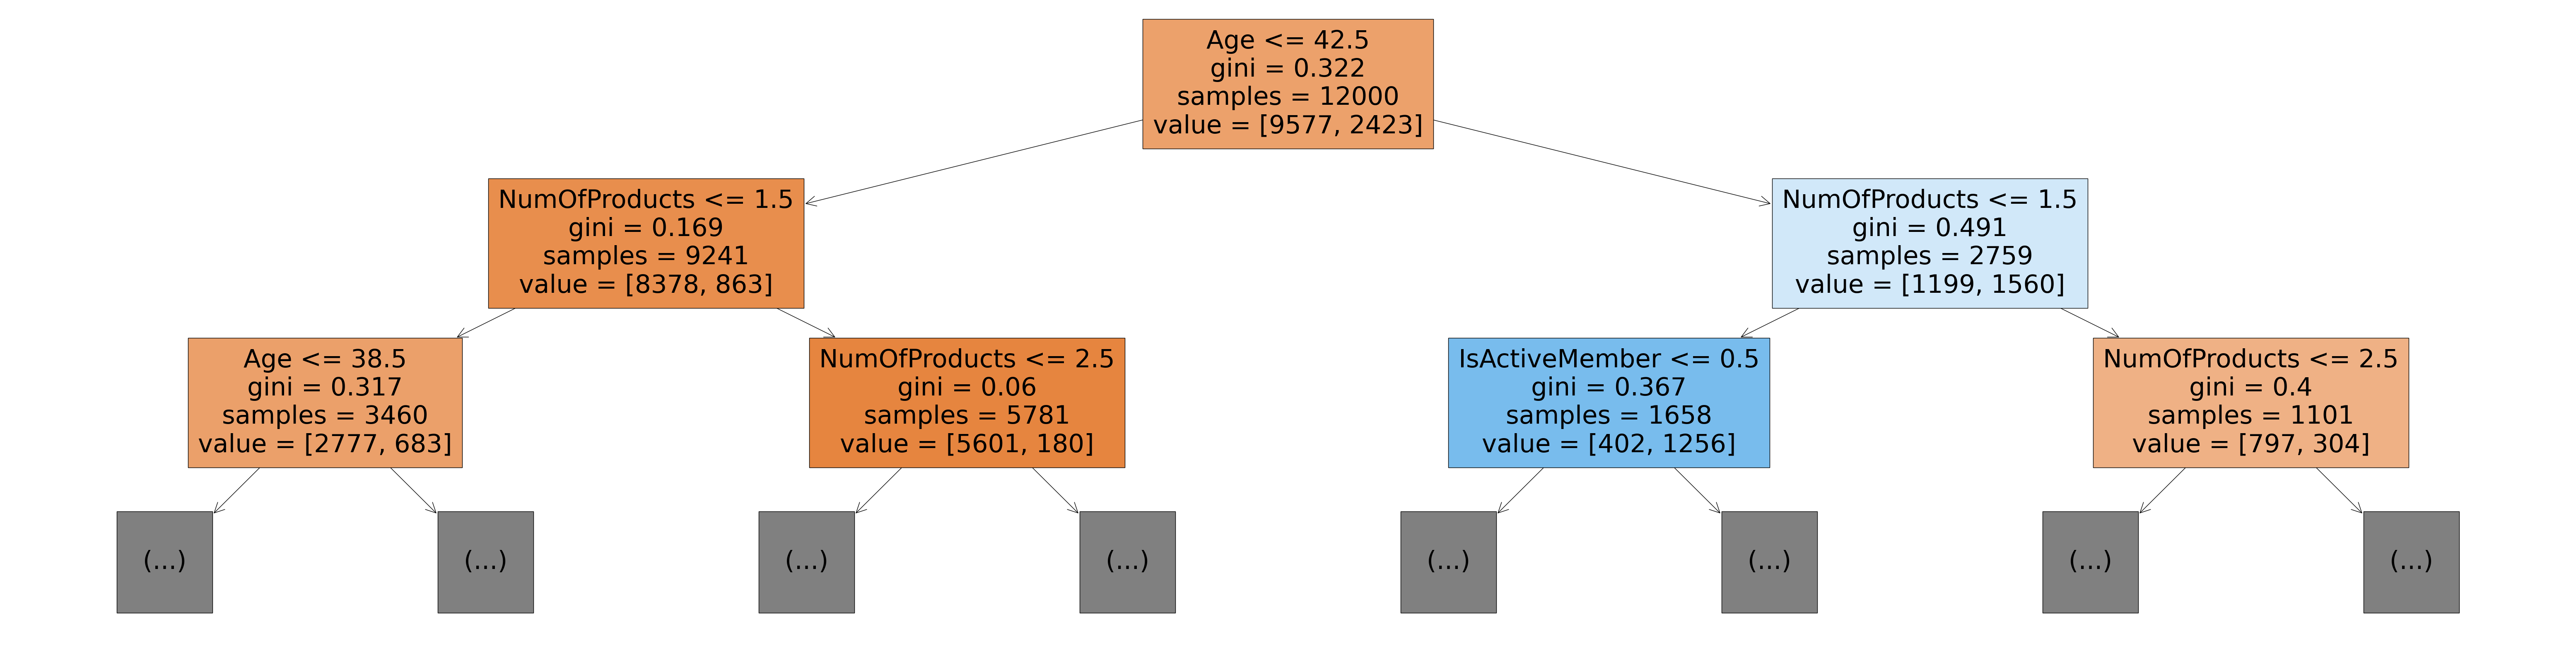

In [9]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [10]:
print(export_text(model, max_depth=2, feature_names=list(X_train.columns)))

|--- Age <= 42.50
|   |--- NumOfProducts <= 1.50
|   |   |--- Age <= 38.50
|   |   |   |--- truncated branch of depth 23
|   |   |--- Age >  38.50
|   |   |   |--- truncated branch of depth 16
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 20
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- truncated branch of depth 9
|--- Age >  42.50
|   |--- NumOfProducts <= 1.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 17
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- truncated branch of depth 4



З візуалізації бачимо, що найвпливовішими є 
- Age
- NumOfProducts

In [11]:
importance = model.feature_importances_.round(2)
importance_df = pd.DataFrame({
    'feaches': X_train.columns,
    'importance': importance
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feaches,importance
1,Age,0.34
4,NumOfProducts,0.18
0,CreditScore,0.12
7,EstimatedSalary,0.12
3,Balance,0.08
2,Tenure,0.06
6,IsActiveMember,0.04
9,Geography_Germany,0.02
5,HasCrCard,0.01
10,Geography_Spain,0.01


<Axes: title={'center': 'Feature importances'}, xlabel='importance', ylabel='feaches'>

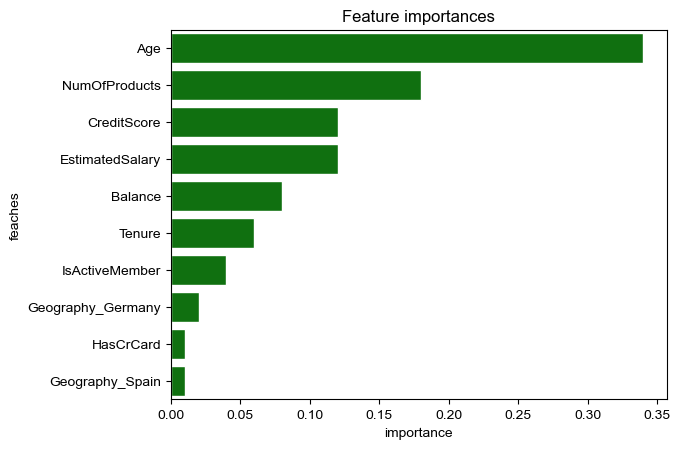

In [12]:
plt.title('Feature importances')
sns.set_style('darkgrid')
sns.barplot(data=importance_df.head(10), x='importance', y='feaches', color='Green')


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [41]:
model_1 = DecisionTreeClassifier(random_state=42, max_depth=6,  min_samples_leaf=6 )#min_samples_split=5),max_features='sqrt',)
model_1.fit(X_train, train_targets)

train_preds_1 = model_1.predict(X_train)
val_preds_1 = model_1.predict(X_val)

train_probs_1 = model_1.predict_proba(X_train)
val_probs_1 = model_1.predict_proba(X_val)

display(len(train_targets), pd.Series(train_preds_1).value_counts(normalize=True))
display(len(val_targets),pd.Series(val_preds_1).value_counts(normalize=True))

fpr, tpr, thresholds = roc_curve(train_targets, train_probs_1[:, 1], pos_label=1.0)
roc_auc_train_1 = auc(fpr, tpr)
print(f'AUROC for Train: {roc_auc_train_1:.2f}')

fpr, tpr, thresholds = roc_curve(val_targets, val_probs_1[:, 1], pos_label=1.0)
roc_auc_val_1 = auc(fpr, tpr)
print(f'AUROC for Valid: {roc_auc_val_1:.2f}')

12000

0.0    0.83475
1.0    0.16525
Name: proportion, dtype: float64

3000

0.0    0.829
1.0    0.171
Name: proportion, dtype: float64

AUROC for Train: 0.94
AUROC for Valid: 0.92


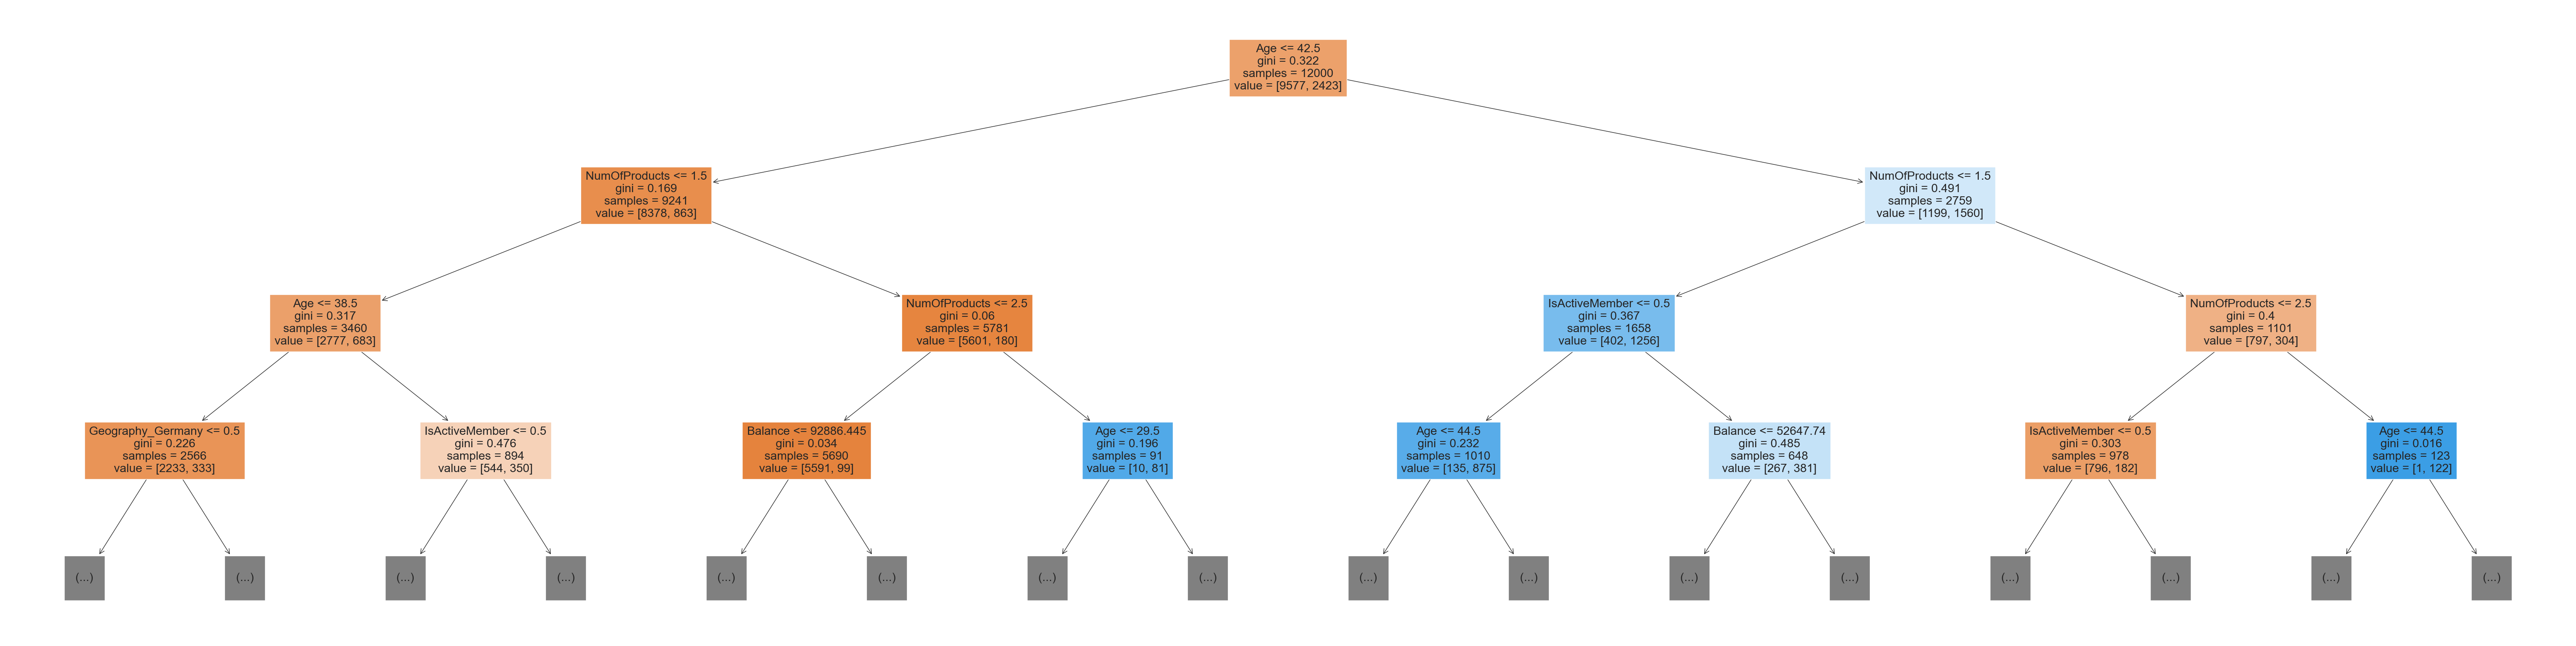

In [42]:
plt.figure(figsize=(80,20))
plot_tree(model_1, feature_names=X_train.columns, max_depth=3, filled=True);

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [17]:
def max_depth_error(md):
    model_3 = DecisionTreeClassifier(max_depth=md, random_state=42)
    model_3.fit(X_train, train_targets)
    
    train_probs_3 = model_3.predict_proba(X_train)
    val_probs_3 = model_3.predict_proba(X_val)

    fpr, tpr, thresholds = roc_curve(train_targets, train_probs_3[:, 1], pos_label=1.0)
    roc_auc_train_3 = auc(fpr, tpr)
    #print(f'AUROC for Train: {roc_auc_train_1:.2f}')

    fpr, tpr, thresholds = roc_curve(val_targets, val_probs_3[:, 1], pos_label=1.0)
    roc_auc_val_3 = auc(fpr, tpr)
    #print(f'AUROC for Valid: {roc_auc_val_1:.2f}')

    train_error = 1 - roc_auc_train_3
    val_error = 1 - roc_auc_val_3

    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [18]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 483 ms, sys: 32.8 ms, total: 516 ms
Wall time: 818 ms


In [19]:
errors_df.sort_values('Validation Error', ascending=True).style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
5,6,0.063449,0.086946
6,7,0.056988,0.088293
4,5,0.072781,0.090190
3,4,0.085456,0.099675
7,8,0.048126,0.107869
2,3,0.098642,0.118439
8,9,0.038508,0.121328
9,10,0.027992,0.155388
1,2,0.150090,0.158012
10,11,0.018563,0.167739


Бачимо, що найліпша глибина буде = 6 гілкам, як і бачили в попередньому завданні, що це дає гарні результати помилок

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [43]:
test_df = pd.read_csv('./bank-customer-churn-prediction-dlu/test.csv')

test_data = preprocess_new_data(test_df, test_df.columns, data['numeric_cols'] , data['categorical_cols'] , data['scaler'], data['encoder'], False)
X_test = test_data['new_df']
display(X_test)

model_final = DecisionTreeClassifier(random_state=42, max_depth=6,  min_samples_leaf=6 )
model_final.fit(X_train, train_targets)
prob_test_df = model_final.predict_proba(X_test.iloc[:, 1:])[:,1]

X_test['Exited']  = prob_test_df

display(X_test)


,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15000,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
1,15001,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
2,15002,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0
3,15003,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0
4,15004,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,639.0,38.0,10.0,0.00,2.0,1.0,1.0,49637.65,0.0,0.0,1.0,0.0,1.0
9996,24996,678.0,39.0,9.0,0.00,2.0,1.0,1.0,142513.50,0.0,0.0,1.0,0.0,1.0
9997,24997,774.0,30.0,9.0,0.00,2.0,1.0,0.0,4861.72,1.0,0.0,0.0,0.0,1.0
9998,24998,595.0,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09,1.0,0.0,0.0,0.0,1.0


,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0,0.163880
1,15001,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0,0.022634
2,15002,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0,0.167808
3,15003,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0,0.677083
4,15004,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0,0.068773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,639.0,38.0,10.0,0.00,2.0,1.0,1.0,49637.65,0.0,0.0,1.0,0.0,1.0,0.016518
9996,24996,678.0,39.0,9.0,0.00,2.0,1.0,1.0,142513.50,0.0,0.0,1.0,0.0,1.0,0.022634
9997,24997,774.0,30.0,9.0,0.00,2.0,1.0,0.0,4861.72,1.0,0.0,0.0,0.0,1.0,0.016518
9998,24998,595.0,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09,1.0,0.0,0.0,0.0,1.0,0.023611


In [45]:
sample_submission_df_tree = pd.read_csv('./bank-customer-churn-prediction-dlu/sample_submission.csv')
sample_submission_df_tree.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [46]:
sample_submission_df_tree['Exited'] = X_test['Exited'].round(2)

In [48]:
sample_submission_df_tree.to_csv('submission_tree_2.csv', index=False)

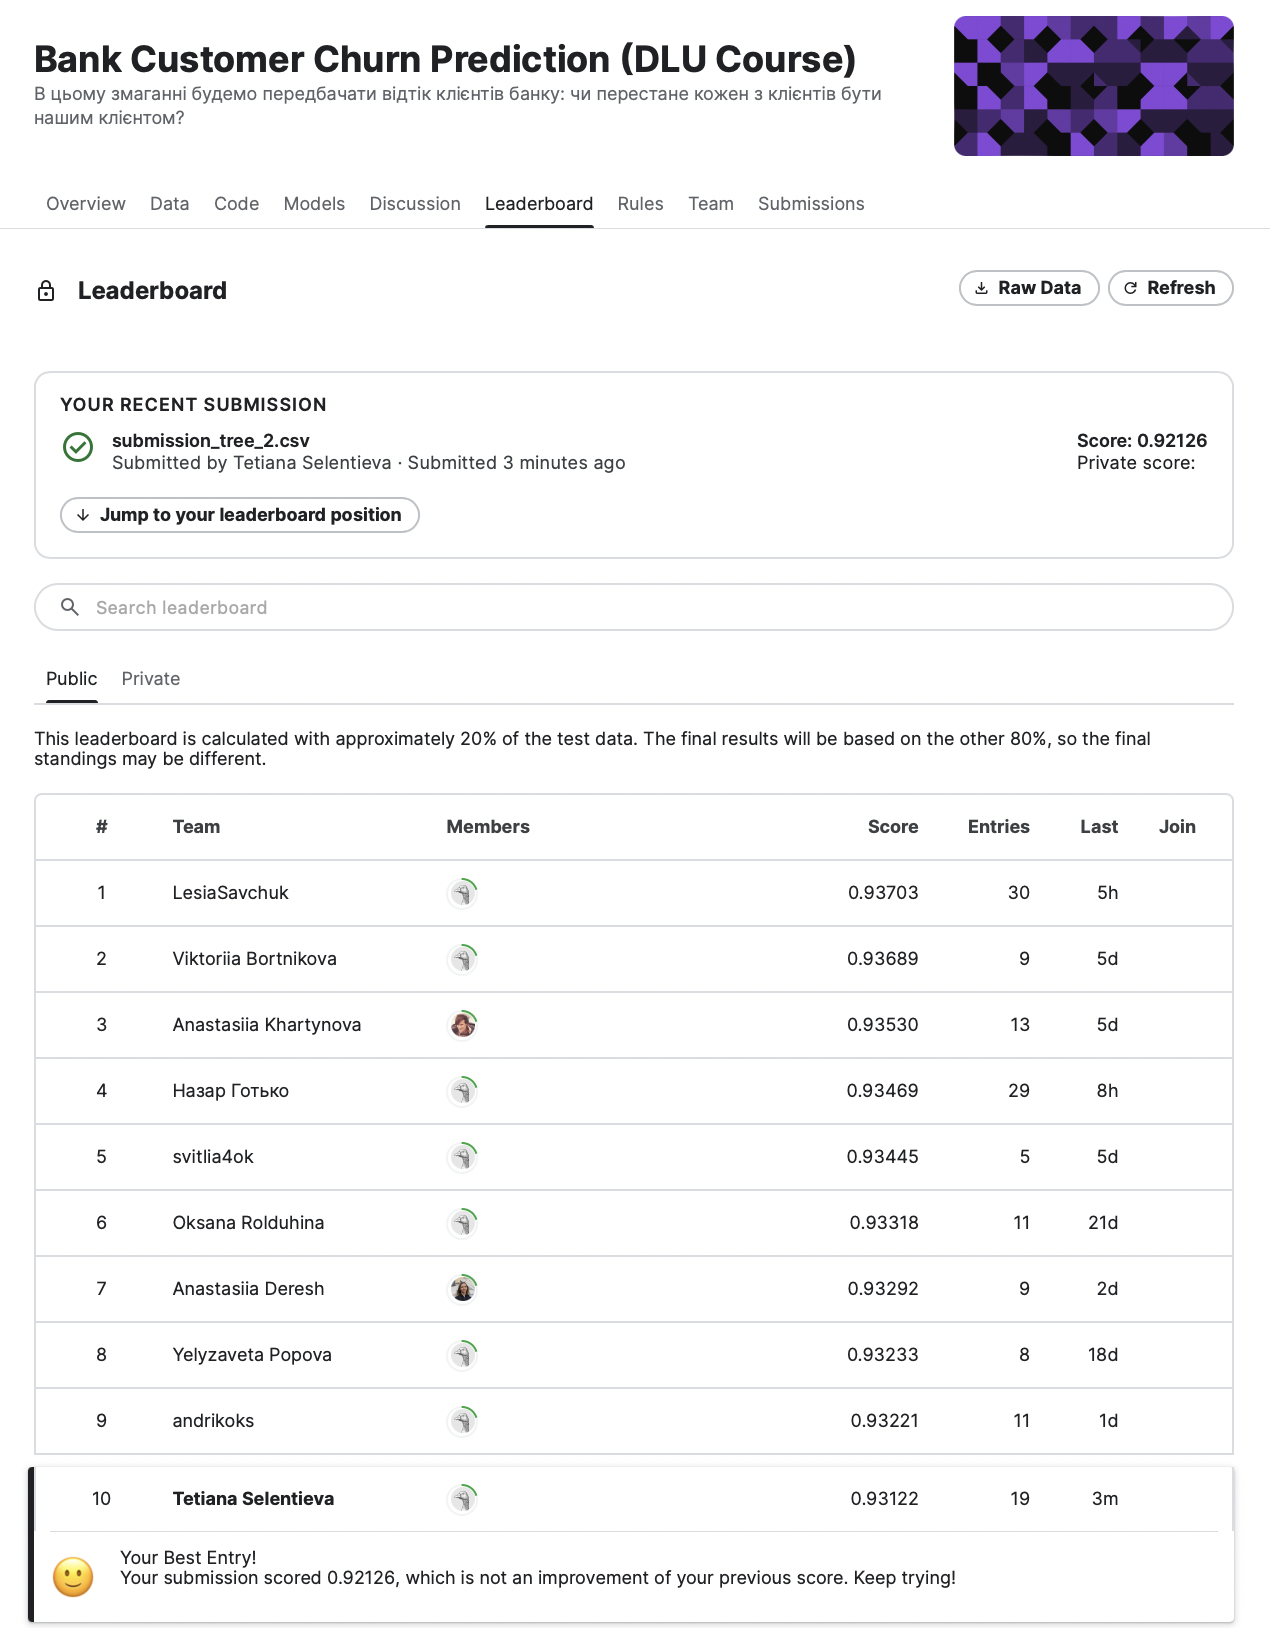